
# Neural Network From Scratch (NumPy)

This notebook demonstrates how to build a simple feedforward neural network
from scratch using NumPy, without using deep learning frameworks.

### What this notebook covers:
- Synthetic data generation
- Forward propagation
- Backpropagation
- Gradient descent
- Training loss visualization


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:

np.random.seed(42)

def generate_data(samples=500):
    X = np.random.randn(samples, 2)
    y = (X[:, 0] + X[:, 1] > 0).astype(int)
    return X, y

X, y = generate_data()

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (500, 2)
Target shape: (500,)


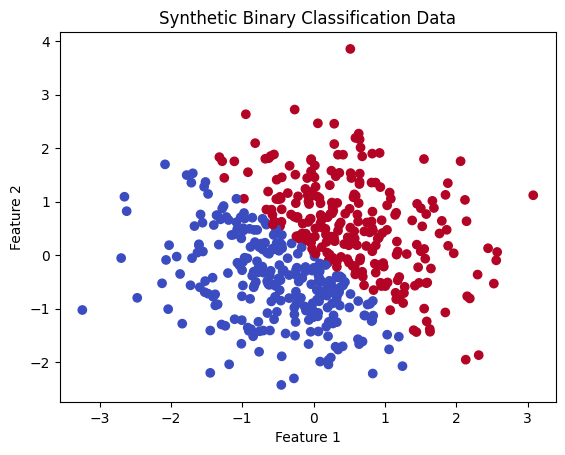

In [3]:

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Binary Classification Data")
plt.show()


In [4]:

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, a):
        return a * (1 - a)

    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

    def backward(self, X, y, learning_rate=0.1):
        m = y.shape[0]
        y = y.reshape(-1, 1)

        dz2 = self.a2 - y
        dW2 = (1 / m) * np.dot(self.a1.T, dz2)
        db2 = (1 / m) * np.sum(dz2, axis=0, keepdims=True)

        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = (1 / m) * np.dot(X.T, dz1)
        db1 = (1 / m) * np.sum(dz1, axis=0, keepdims=True)

        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1


In [5]:

nn = NeuralNetwork(input_size=2, hidden_size=8, output_size=1)


In [6]:

epochs = 1000
losses = []

for epoch in range(epochs):
    predictions = nn.forward(X)
    loss = np.mean((predictions - y.reshape(-1, 1)) ** 2)
    losses.append(loss)
    nn.backward(X, y)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 0.2500
Epoch 100, Loss: 0.2498
Epoch 200, Loss: 0.2492
Epoch 300, Loss: 0.2458
Epoch 400, Loss: 0.2261
Epoch 500, Loss: 0.1640
Epoch 600, Loss: 0.0985
Epoch 700, Loss: 0.0646
Epoch 800, Loss: 0.0479
Epoch 900, Loss: 0.0386


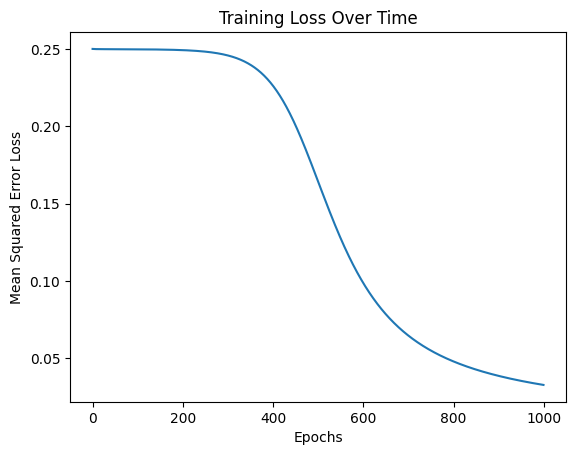

In [7]:

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error Loss")
plt.title("Training Loss Over Time")
plt.show()


In [8]:

def accuracy(y_true, y_pred):
    y_pred = (y_pred > 0.5).astype(int)
    return np.mean(y_true.reshape(-1, 1) == y_pred)

final_predictions = nn.forward(X)
print("Training Accuracy:", accuracy(y, final_predictions))


Training Accuracy: 0.99



## Conclusion

In this notebook, we implemented a neural network from scratch using NumPy.
This helped reinforce understanding of forward propagation, backpropagation,
and gradient descent optimization.
